In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [215]:
data = pd.read_csv("concrete_data.csv")

In [216]:
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [217]:
data.shape

(1030, 9)

In [218]:
data.size

9270

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [220]:
data.rename(columns={"concrete_compressive_strength" : "c_c_strength"}, inplace= True)

In [221]:
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,c_c_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [222]:
data.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
c_c_strength          0
dtype: int64

In [223]:
data["fine_aggregate "].dtype

dtype('float64')

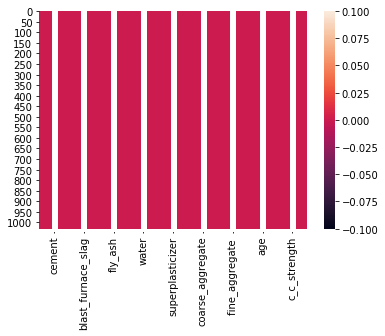

In [224]:
sns.heatmap(data.isnull(), annot = True)

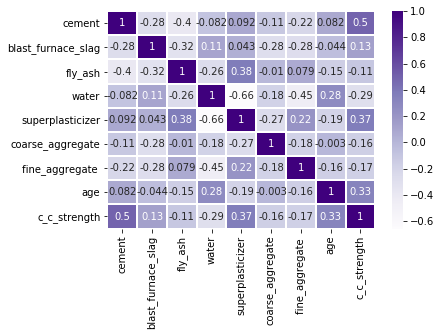

In [225]:
sns.heatmap(data.corr(), annot=True, cmap="Purples", linewidths=1)

#as we can see the heatmap there are two types of correlation like positive and negitive correlations
#there is high correlation of 0.5 between ccstrength and cement
#and ther is a positive corellation between ccstrength and age of 0.33 and superplasticizer and ccstrength of 0.37
#flyash and superplast with 0.38. there is also negitive correation of -0.32 flyash and blast furnance 

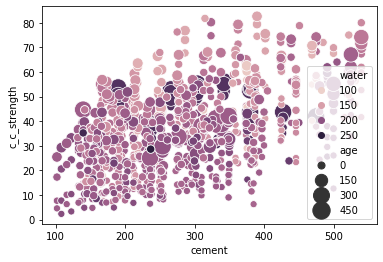

In [226]:
sns.scatterplot(y="c_c_strength", x="cement", hue="water",size="age", data=data, sizes=(50, 300))

by the above diagram we can see that
with the increase of cement , ccstrength increases and with less water there is more strength, more age bring more ccstrength

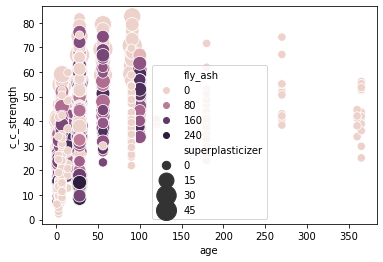

In [227]:
sns.scatterplot(y="c_c_strength", x="age", hue="fly_ash",
   size="superplasticizer", data=data, sizes=(70, 400))

ccstrength icreases with the increase of superplasticizer,as the fly ash increases the ccstrength decresses

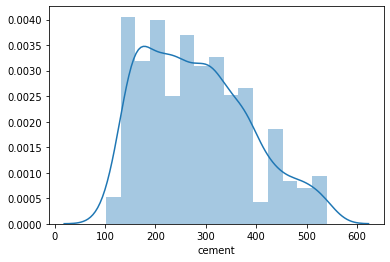

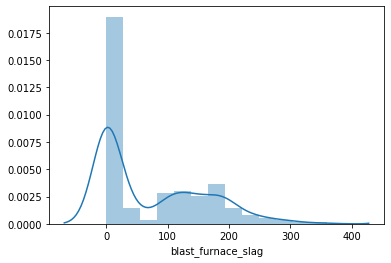

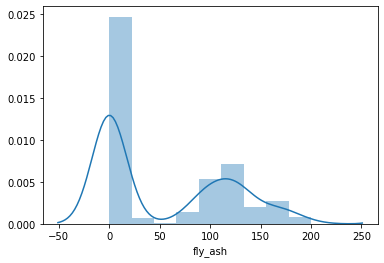

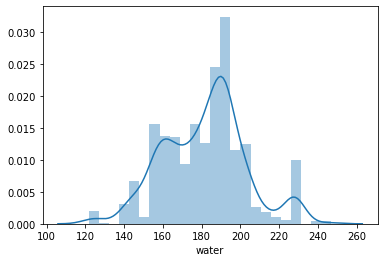

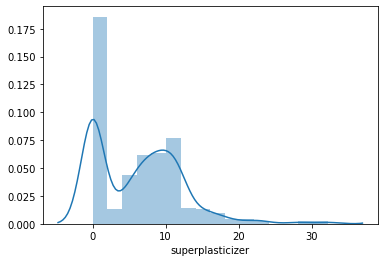

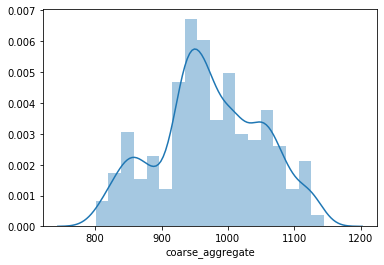

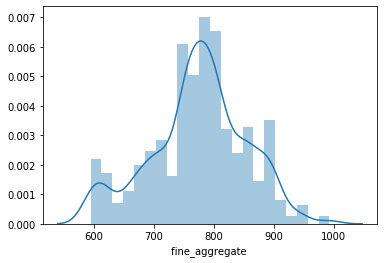

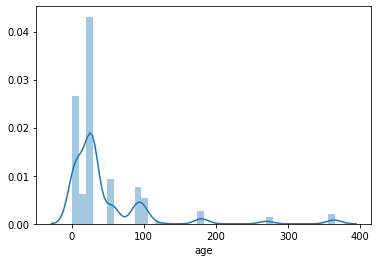

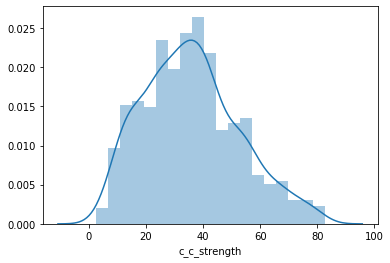

In [228]:
for i in data:
    plt.figure()
    sns.distplot(data[i])

In [229]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [231]:
x.shape

(1030, 8)

In [232]:
y.shape

(1030,)

In [233]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [234]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [253]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
ran = RandomForestRegressor()

lr.fit(x_train, y_train)
print("score of lr :", lr.score(x_train,y_train)*100)
lasso.fit(x_train, y_train)
print("score of lasso :", lasso.score(x_train,y_train)*100)
ridge.fit(x_train, y_train)
print("score of ridge :", ridge.score(x_train,y_train)*100)
ran.fit(x_train,y_train)
print("score of ran :", ran.score(x_train,y_train)*100)


predlr = lr.predict(x_test)
predlasso = lasso.predict(x_test)
predridge = ridge.predict(x_test)
predran = ran.predict(x_test)

score of lr : 62.395975995878985
score of lasso : 57.731336127736284
score of ridge : 62.393734161769686
score of ran : 98.4666215886935


In [244]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
print("r2 score is :", r2_score(y_test, predlr))
print("MSE :",mean_squared_error(y_test, predlr))
print("MAE :",mean_absolute_error(y_test, predlr))
print("\n")

print("r2 score is :", r2_score(y_test, predlasso))
print("MSE :",mean_squared_error(y_test, predlasso))
print("MAE :",mean_absolute_error(y_test, predlasso))
print("\n")

print("r2 score is :", r2_score(y_test, predridge))
print("MSE :",mean_squared_error(y_test, predridge))
print("MAE :",mean_absolute_error(y_test, predridge))
print("\n")

print("r2 score is :", r2_score(y_test, predran))
print("MSE :",mean_squared_error(y_test, predran))
print("MAE :",mean_absolute_error(y_test, predran))
print("\n")


r2 score is : 0.5701142652757779
MSE : 105.76432225737781
MAE : 8.226419967037106


r2 score is : 0.5362119575108408
MSE : 114.1052703607613
MAE : 8.65416309916938


r2 score is : 0.5698108237748967
MSE : 105.83897764157207
MAE : 8.235120453206216


r2 score is : 0.8930557219276839
MSE : 26.31138504021113
MAE : 3.5261993111419296




Text(0.5, 1.0, 'RandomForest Regression')

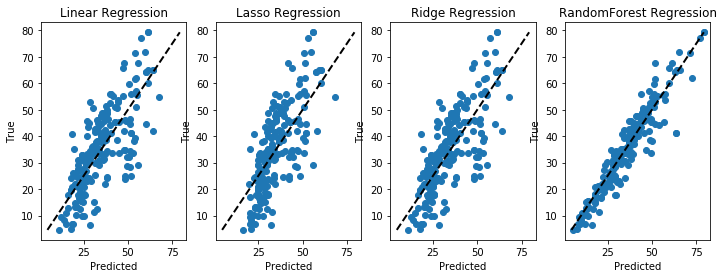

In [245]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(12,4))

ax1.scatter(predlr, y_test)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(predlasso, y_test)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(predridge, y_test)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

ax4.scatter(predran, y_test)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("RandomForest Regression")




score : 99.59840744050683
r2 score is : 0.8311795931571357
MSE : 41.53470206310679
MAE : 4.313567961165049




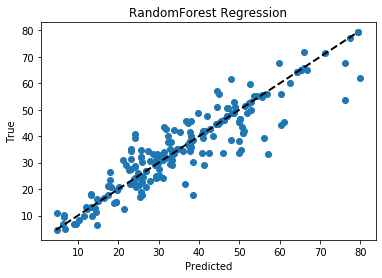

In [259]:
from sklearn.tree import DecisionTreeRegressor

Dec = DecisionTreeRegressor()
Dec.fit(x_train,y_train)
print("score :", Dec.score(x_train,y_train)*100)
predDec = Dec.predict(x_test)

print("r2 score is :", r2_score(y_test, predDec))
print("MSE :",mean_squared_error(y_test, predDec))
print("MAE :",mean_absolute_error(y_test, predDec))
print("\n")

plt.scatter(predDec, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("RandomForest Regression")
plt.show()




so we have decision trees and random forest we can select for future selection


In [255]:
import joblib

joblib.dump(Dec, "concretedecmodel")

['concretedecmodel']

In [256]:
joblib.dump(ran, "concreteranmodel")


['concreteranmodel']

In [257]:
obj1 = joblib.load("concreteranmodel")
obj2 = joblib.load("concretedecmodel")

In [260]:
t = np.array([[540,0,0,162,2.5,1040,676,28]])

In [262]:
t.shape

(1, 8)

In [263]:
t.reshape(1, -1)

array([[ 540. ,    0. ,    0. ,  162. ,    2.5, 1040. ,  676. ,   28. ]])

In [264]:
obj1.predict(t)

array([54.81126667])

In [265]:
obj2.predict(t)

array([59.59])

results are good soo we can predict with these